Xs:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Ys:
 [5, 4, 0, 6, 10, 9, 8, 14, 19, 22, 23, 27, 27, 28, 29, 26, 29, 36, 32, 39, 44, 47, 42, 42, 52, 47, 56, 56, 52, 57, 62, 59, 67, 64, 69, 69, 76, 78, 73, 75, 83, 82, 89, 83, 84, 87, 91, 92, 96, 103, 96, 102, 100, 110, 107, 110, 108, 114, 116, 115, 119, 127, 126, 129, 132, 134, 129, 133, 137, 143, 141, 145, 148, 150, 147, 154, 153, 159, 159, 163]

R Squared =  0.9958028153542893
More closer the value - 'R Squared' to 1 the best fit.


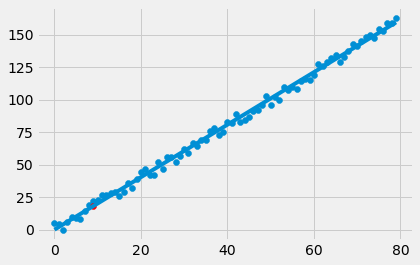

In [5]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

# Create random xs, ys as we per our requirement of
# hm - stands for how many points to be created
# variance - how dense the points to the line of best fit
# step - distance between points
# correlation - if true and 'pos' then +ve correlation
#               if true and 'neg' then -ve correlation
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(int(y))
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [int(i) for i in range(len(ys))]
    
    print("Xs:\n", xs)
    print("Ys:\n", ys)

    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

# Find m and b for y = mx + b with the xs and ys
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) /
         ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return (1 - (squared_error_regr / squared_error_y_mean))

xs, ys = create_dataset(80, 5, 2, correlation='pos')
#xs, ys = create_dataset(40, 40, 2, correlation='pos')
#xs, ys = create_dataset(40, 80, 2, correlation='neg')

# Call the regression function for xs, ys
m, b = best_fit_slope_and_intercept(xs, ys)

# Find y values for xs using the linear equation
regression_line = [(m * x) + b for x in xs]

# Predict y for x using the fitted line equation
predict_x = 9
predict_y = (m * predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)
print("\nR Squared = ", r_squared)
print("More closer the value - 'R Squared' to 1 the best fit.")

# Plot the line 
plt.scatter(xs, ys)

# Sow the estimated value in a different color
plt.scatter(predict_x, predict_y, color='r')

# Show the fitted equation as a line
plt.plot(xs, regression_line)
plt.show()
